<a href="https://colab.research.google.com/github/chelseawmk/Bank-Marketing-Analysis/blob/master/Bank_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


from google.colab import files
uploaded = files.upload()

In [3]:
url='https://raw.githubusercontent.com/chelseawmk/Bank-Marketing-Analysis/master/bank-additional-full.csv'
bank = pd.read_csv(url,sep = ';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
y = pd.get_dummies(bank['y'], columns = ['y'], drop_first = True)

In [6]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()
# bank.isnull().any() # one way to search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# EDA: Client Demographics Information
- Work with the atributes related to bank clients
- To make things more clear, i'm going to creat a new datasets that contains just this part of data

In [7]:
#subset the client information in "bank_client" 
bank_client = bank.iloc[:,[0,1,2,3,4,5,6,7]]
bank_client.head()

,age,job,marital,education,default,housing,loan,contact
0,56,housemaid,married,basic.4y,no,no,no,telephone
1,57,services,married,high.school,unknown,no,no,telephone
2,37,services,married,high.school,no,yes,no,telephone
3,40,admin.,married,basic.6y,no,no,no,telephone
4,56,services,married,high.school,no,no,yes,telephone


## 1.1 Age

In [8]:
#Is there any strange value or null value?
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


<function matplotlib.pyplot.show>

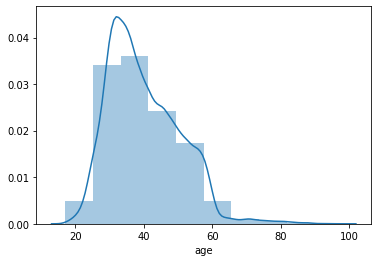

In [9]:
age=bank_client['age'].dropna()
sns.distplot(age, bins=10)         
plt.show

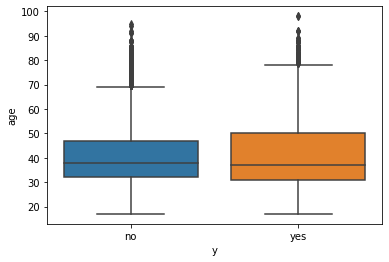

In [10]:
sns.boxplot( y=bank["age"],x=bank["y"] );
plt.show()

The box plot doesn't incate much differences among age for buying or not buying long term deposit.

In [11]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


kaggle:
"Conclusion about AGE, in my opinion due to almost high dispersion and just looking at this this graph we cannot conclude if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscript a term deposit, or not.
The outliers was calculated, so my thinking is fit the model with and without them"

## 1.2 Employment

<function matplotlib.pyplot.show>

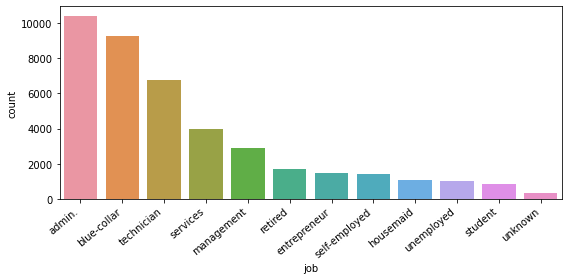

In [12]:
# distribution of jobs

plt.figure(figsize=(8,4))
job = sns.countplot(x="job",
                    data=bank,
                   order = bank['job'].value_counts().index) 

job.set_xticklabels(job.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

plt.show

<function matplotlib.pyplot.show>

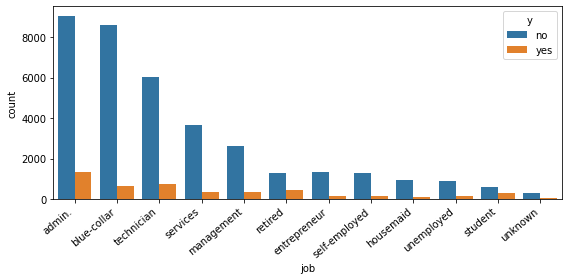

In [13]:
#distribution of job differenciated for custromer buying and not buying term deposit


plt.figure(figsize=(8,4))
job = sns.countplot(x="job",
                    hue="y",
                    data=bank,
                    order = bank['job'].value_counts().index
                   ) 

job.set_xticklabels(job.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

plt.show


## 1.3 Marital Status

<function matplotlib.pyplot.show>

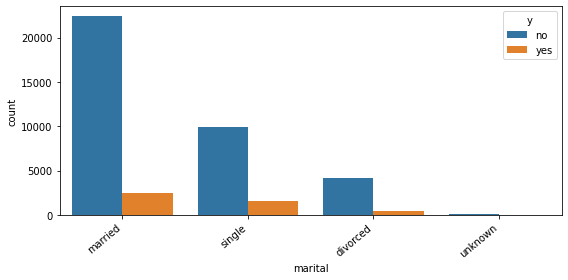

In [14]:
# What kind of 'marital clients' this bank have, is it realted to whether people buy the long-term deposit?

plt.figure(figsize=(8,4))
job = sns.countplot(x="marital",
                    hue="y",
                    data=bank
                    #order = bank['job'].value_counts().index
                   ) 

job.set_xticklabels(job.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

plt.show

Seems marital status has no impact on people's decision.

## 1.4 Education

<function matplotlib.pyplot.show>

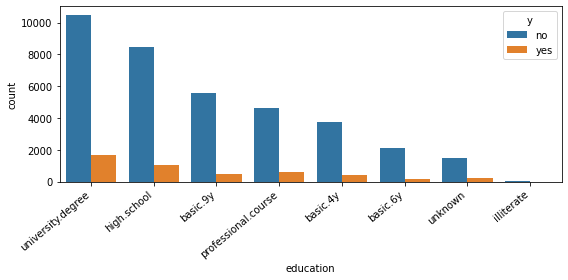

In [15]:
# What kind of education level of this bank's customers, is it realted to whether people buy the long-term deposit?

plt.figure(figsize=(8,4))
job = sns.countplot(x="education",
                    hue="y",
                    data=bank,
                    order = bank['education'].value_counts().index
                   ) 

job.set_xticklabels(job.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

plt.show

## 1.5 Default status of bank

<function matplotlib.pyplot.show>

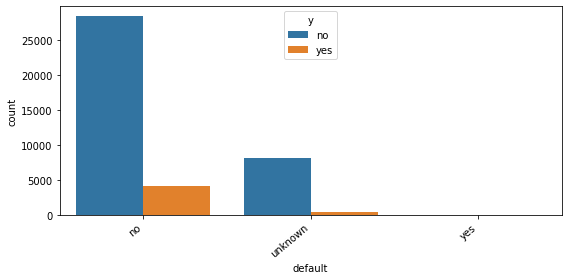

In [16]:
# What default history distribution of this bank's customers, is it realted to whether people buy the long-term deposit?
plt.figure(figsize=(8,4))
job = sns.countplot(x="default",
                    hue="y",
                    data=bank,
                    order = bank['default'].value_counts().index
                   ) 

job.set_xticklabels(job.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

plt.show

Pretty much customers' default history are unknown (almost 1/3?). Can the data be include in the logit model?

## 1.6 Housing

<function matplotlib.pyplot.show>

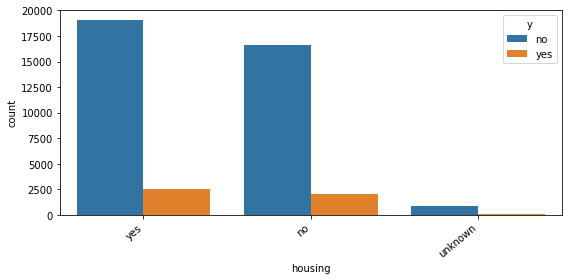

In [17]:
# What's housing status of this bank's customers, is it realted to whether people buy the long-term deposit?

plt.figure(figsize=(8,4))
job = sns.countplot(x="housing",
                    hue="y",
                    data=bank,
                    order = bank['housing'].value_counts().index
                    ) 

job.set_xticklabels(job.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

plt.show

There are more customers who have housing loan than customers who don't.  
The impact of housing loan is not clear here.
But in guts call, will people having housing loan have less probability to take long-term loan?  We need to explore further.

## 1.7 Loan

<function matplotlib.pyplot.show>

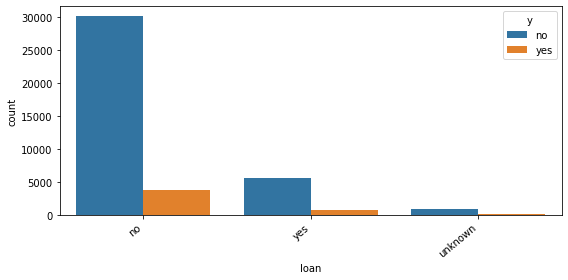

In [18]:
# What's housing status of this bank's customers, is it realted to whether people buy the long-term deposit?

plt.figure(figsize=(8,4))
job = sns.countplot(x="loan",
                    hue="y",
                    data=bank,
                    order = bank['loan'].value_counts().index
                    ) 

job.set_xticklabels(job.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

plt.show

Most of the customers don't have personal loan.  
Again, will people having personal loan have less probability to take long-term loan?  We need to explore further.

# EDA: Historical Campaign Response

## 2.1 Previous contact calls

Let's first see what is the relationship between **call duration** and **decision of customer**.

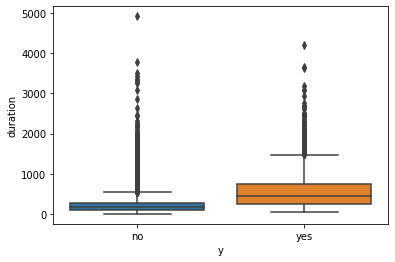

In [19]:
sns.boxplot( y=bank["duration"],x=bank["y"] );
plt.show()

We runned spearman correlation test for call duration and buying decision of customers. 
Alternative hypothesis here is: correlation between duration and customer decision is positive.
We got p value smaller than any reasonable value.  
(Test run in R)


In [0]:
## 2.2 month and day of week

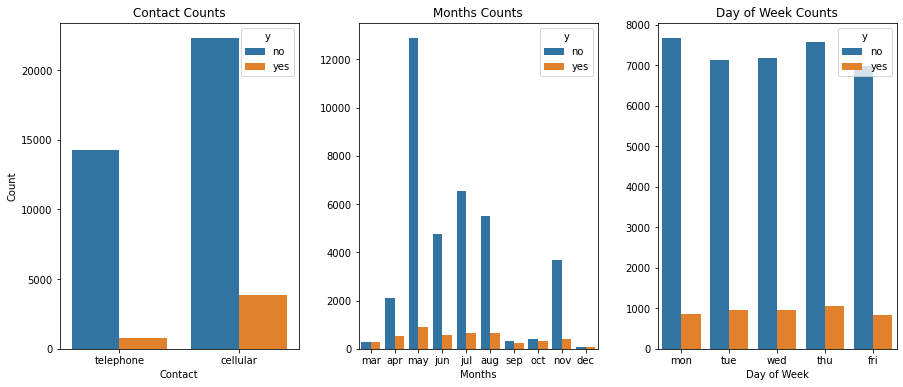

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank['contact'],hue="y", data=bank,ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank['month'],hue="y", data=bank, ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank['day_of_week'], hue="y",data=bank, ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

For March, September, October, December, almost half of the customers contacted has subscribed the long term deposit product.  
But that does not necessarily mean in these months the success probability is higher because the contact amount is comparatively low in these months.  


## 2.2 Previous Marketing Campagin 
outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')



<function matplotlib.pyplot.show>

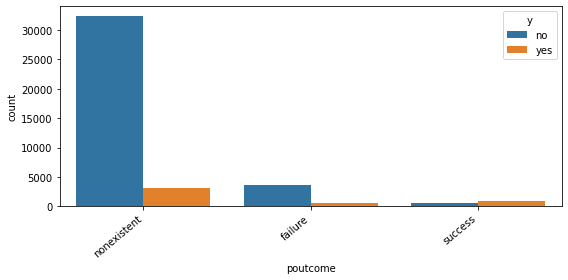

In [22]:
plt.figure(figsize=(8,4))
job = sns.countplot(x="poutcome",
                    hue="y",
                    data=bank,
                    order = bank['poutcome'].value_counts().index
                    ) 

job.set_xticklabels(job.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

plt.show

The poutcome = "success" is noteworthy because there's more SUBSCRIBE more than NOT SUBSCRIBE 

# **Data preprocessing**


In [23]:
bank_t=bank
y = pd.get_dummies(bank_t['y'], drop_first = True)
bank_t=bank_t.join(y)
bank_t=bank_t.drop(columns=['y'])
bank_t=bank_t.rename(columns={'yes':'y'})
bank_t.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [24]:
category_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in category_vars:
    category_list = pd.get_dummies(bank_t[var], prefix=var, drop_first = True)
    data=bank_t.join(category_list)
    bank_t=data

bank_t

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [25]:
data_final=bank_t.drop(columns=category_vars)
data_final
# .columns.values
#data_final.columns.corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


# **Split train test data**

In [26]:
# y = data_final.pop['y']
# X = data_final

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train,test=train_test_split(data_final,test_size=0.2, stratify=data_final['y'])

train['y'].value_counts()/len(train)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

0    0.887344
1    0.112656
Name: y, dtype: float64

In [0]:
train_y=train['y']
train_x=train.drop(['y'],axis=1)

In [0]:
test_y=test['y']
test_x=test.drop(['y'],axis=1)

# **Feature Engineering (Recursive Feature Elimination)**



In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(train_x, train_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False  True  True
 False False  True False  True  True False False False False False False
 False False False False False False  True  True False False False False
 False  True  True  True  True  True  True  True False  True False  True
 False False False  True  True]
[22 21  5 24  1  9 13 11  1 18  1  1 28 34  1 32  1  1 15 19 31 17  6 27
  3 14 16 30 12  4  1  1 33 25 20 26  8  1  1  1  1  1  1  1 10  1 23  1
 29  7  2  1  1]


In [30]:
columns=train_x.columns[rfe.support_]
X=train_x[columns]
y=train_y
columns

Index(['previous', 'euribor3m', 'job_blue-collar', 'job_entrepreneur',
       'job_retired', 'job_services', 'job_student', 'education_unknown',
       'default_unknown', 'contact_telephone', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_oct',
       'day_of_week_mon', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

# Prediction Model

In [32]:
#input columns after feature elimination
logit_model2 = smd.MNLogit(train_y, train_x[columns])
result2 = logit_model2.fit()

print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.281642
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                32950
Model:                        MNLogit   Df Residuals:                    32930
Method:                           MLE   Df Model:                           19
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.2000
Time:                        19:59:55   Log-Likelihood:                -9280.1
converged:                       True   LL-Null:                       -11599.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 y=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                -0.2587      0.037     -6.979      0.000      -0.331      -0.186

In [0]:
cols=['previous', 'euribor3m', 'job_blue-collar', 'job_retired',
        'job_services', 'job_student', 'default_unknown',
        'contact_telephone', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'day_of_week_mon',
       'day_of_week_thu','poutcome_nonexistent', 'poutcome_success']

In [34]:

logit_model3 = smd.MNLogit(train_y, train_x[cols])
result3 = logit_model3.fit()

print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.281555
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                32950
Model:                        MNLogit   Df Residuals:                    32932
Method:                           MLE   Df Model:                           17
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.2002
Time:                        19:59:58   Log-Likelihood:                -9277.2
converged:                       True   LL-Null:                       -11599.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 y=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                -0.2062      0.037     -5.557      0.000      -0.279      -0.133

# Model Evaluation

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(train_x, train_y)

print(logreg.score(test_x, test_y))

0.9053168244719592


In [36]:
from sklearn.model_selection import cross_val_score
data_copy = data_final.copy()
logreg2 = LogisticRegression()
y = data_copy.pop('y')
X = data_copy[columns]
logreg2.fit(X, y)
np.mean(cross_val_score(logreg, X, y, cv = 10))

0.8519628120246372

In [37]:
# baseline: majority class
1 -len(data_final[data_final['y'] == 1]) / len(data_final)

0.8873458288821987

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, logreg.predict(test_x))
print(confusion_matrix)

[[7107  203]
 [ 577  351]]


In [39]:
(confusion_matrix[1,1]+confusion_matrix[0,0])/sum(confusion_matrix[:])

array([ 0.97058824, 13.46209386])

In [0]:
import numpy as np

In [0]:
data_copy = data_final.copy()
y = data_copy.pop('y')
X = data_copy


In [0]:

for i in range(54, 10, -2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)
    logreg_ = LogisticRegression()
    rfe_ = RFE(logreg_, i)
    rfe_ = rfe_.fit(X, y.values.ravel())
    columns_ = X.columns[rfe_.support_]
    X_rfe = X[columns_]
    X_train_rfe = X_train[columns_]
    logit_model_ = smd.MNLogit(X_train_rfe, y_train)
    result_ = logit_model_.fit()
    print(result_.summary)
    print('num of var:', i)
    print('AIC:', result_.aic)
    logreg_.fit(X_train_rfe, y_train)
    print('cross validation score:', np.mean(cross_val_score(logreg_, X_rfe, y, cv = 10)))
    print('testing accuracy:', logreg_.score(X_test[columns_], y_test))


Optimization terminated successfully.
         Current function value: nan
         Iterations 2
<bound method DiscreteResults.summary of <statsmodels.discrete.discrete_model.MultinomialResults object at 0x7f38d2422c50>>
num of var: 54
AIC: nan
cross validation score: 0.8529098796005812
testing accuracy: 0.9112648701141054
Optimization terminated successfully.
         Current function value: nan
         Iterations 2
<bound method DiscreteResults.summary of <statsmodels.discrete.discrete_model.MultinomialResults object at 0x7f38d2447dd8>>
num of var: 52
AIC: nan
cross validation score: 0.8524484846812665
testing accuracy: 0.9119932022335518
Optimization terminated successfully.
         Current function value: nan
         Iterations 2
<bound method DiscreteResults.summary of <statsmodels.discrete.discrete_model.MultinomialResults object at 0x7f38d24227b8>>
num of var: 50
AIC: nan
cross validation score: 0.857158589749984
testing accuracy: 0.9118718135469774
Optimization terminated su

In [0]:
for i in range(20, 10, -2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)
    logreg_ = LogisticRegression()
    rfe_ = RFE(logreg_, i)
    rfe_ = rfe_.fit(X, y.values.ravel())
    columns_ = X.columns[rfe_.support_]
    X_rfe = X[columns_]
    X_train_rfe = X_train[columns_]
    logit_model_ = smd.MNLogit(X_train_rfe, y_train)
    result_ = logit_model_.fit()
    print(result_.summary)
    print('num of var:', i)
    print('AIC:', result_.aic)
    logreg_.fit(X_train_rfe, y_train)
    print('cross validation score:', np.mean(cross_val_score(logreg_, X_rfe, y, cv = 10)))
    print('testing accuracy:', logreg_.score(X_test[columns_], y_test))


In [0]:
data_copy = data_final.copy()
y = data_copy.pop('y')
X = data_copy


In [0]:
i = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)
logreg_ = LogisticRegression()
rfe_ = RFE(logreg_, i)
rfe_ = rfe_.fit(X, y.values.ravel())
columns_ = X.columns[rfe_.support_]
X_rfe = X[columns_]

logit_model_ = smd.MNLogit(X_rfe, y)
result_ = logit_model_.fit()
print(result_.summary)

logreg_.fit(X_train_rfe, y_train)
print('cross validation score:', np.mean(cross_val_score(logreg_, X_rfe, y, cv = 5)))
print(logreg_.score(X_test[columns_], y_test))